# Исследование данных интернет-магазина игр «Стримчик»

**Цель исследования** — для интернет-магазина "Стримчик" требуется выявить определяющие успешность игры закономерности, чтобы правильно сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

**Name** — название игры  
**Platform** — платформа  
**Year_of_Release** — год выпуска  
**Genre** — жанр игры  
**NA_sales** — продажи в Северной Америке (миллионы проданных копий)  
**EU_sales** — продажи в Европе (миллионы проданных копий)  
**JP_sales** — продажи в Японии (миллионы проданных копий)  
**Other_sales** — продажи в других странах (миллионы проданных копий)  
**Critic_Score** — оценка критиков (максимум 100)  
**User_Score** — оценка пользователей (максимум 10)  
**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
  
  
Данные за 2016 год могут быть неполными.

В ходе исследования предпримем следующие шаги:  
  
1. Изучим общую информацию  
2. Выполним предобработка данных  
3. Проведем исследовательский анализ данных  
4. Составим портрет пользователя каждого региона  
5. Проверим гипотезы  
6. Подытожим все выводом и дадим рекомендацию бизнесу.

Импортируем библиотеки

In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

## 1 шаг. Изучение общей общей информации.

### Изучим общую информацию, проверим наличие дубликатов

In [ ]:
games = pd.read_csv('/datasets/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
games.duplicated().sum()

0

### Вывод по общей информации:  
Из общей информации видим, что шести столбцах присутствуют пропуски в данных, названия колонок нарушают стиль, явные дубликаты отсутсувуют. Некоторые колонки имеют неверный тип данных.

## 2 шаг. Предобработка данных

### Обработаем названия столбцов

In [ ]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Так как от "змеиного" регистра названия отличает только наличие заглавных букв, просто приведем все к нижнему регистру.

In [ ]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
# Комментарий ревьюера
tmp = games.copy()  #  Создаем копию датасета
print('Количество пропусков', tmp.year_of_release.isna().sum(), 'Тип данных', tmp.year_of_release.dtype)
tmp.year_of_release = tmp.year_of_release.astype('Int64')
print('Количество пропусков', tmp.year_of_release.isna().sum(), 'Тип данных', tmp.year_of_release.dtype)

Количество пропусков 269 Тип данных float64
Количество пропусков 269 Тип данных Int64


### Обработка неявных дубликатов.

Произведем поиск неявных дубликатов одновременно по столбцам name, platform, year_of_release.

In [ ]:
games[games.duplicated(['name', 'platform', 'year_of_release'])].count()

name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64

In [ ]:
games[games.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Как видим таковых оказалось 2 строчки. Просто удалим их.

In [ ]:
games = games.drop_duplicates(['name', 'platform', 'year_of_release'])
games[games.duplicated(['name', 'platform', 'year_of_release'])].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Обработка пропусков

Напишем функцию для подсчета % пропусков

In [ ]:
def percent(df, column):
    result = '{:.2%}'.format(df[column].isna().sum() / len(df))
    return result

#### Столбец name

In [ ]:
games['name'].isna().sum()

1

Имеем всего 1 пропуск, просто удалим эту строку

In [ ]:
games = games.dropna(subset=['name'])
games['name'].isna().sum()

0

#### Столбец year_of_release

In [ ]:
games['year_of_release'].isna().sum()

269

In [ ]:
percent(games, 'year_of_release')

'1.61%'

Всего 1.61% от общего числа строк, так же просто удалим их

In [ ]:
games = games.dropna(subset=['year_of_release'])
games['year_of_release'].isna().sum()

0

#### Столбец genre

In [ ]:
games['genre'].isna().sum()

0

Пропуски в столбце пропали

#### Столбец critic_score

In [ ]:
games['critic_score'].isna().sum()

8461

In [ ]:
percent(games, 'critic_score')

'51.46%'

51% довольно большая доля от общего числа строк, чтобы их пропустить или удалить. Вероятно, стоит задуматься о замене.  
Медиана и среднее могут сильно отразится на оценке, эти варианты не подходят.

In [ ]:
games['critic_score'].describe()

count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Как видим, минимальное значение оценки 13, значит мы можем заменить пропуски на -1 и считать, что данные по оценке этих игры не поступали.

In [ ]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['critic_score'].isna().sum()

0

#### Столбец user_score

In [ ]:
games['user_score'].isna().sum()

6605

In [ ]:
percent(games, 'user_score')

'40.17%'

40% довольно большая доля от общего числа строк, чтобы их пропустить или удалить. Так же стоит задуматься о замене.  
Замена на медиану или среднюю оценку, тоже может исказить данные.

In [ ]:
games['user_score'].describe()

count     9838
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [ ]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как видим, в данном столбце мы не сможем отметить нулем, так как есть такая оценка. Но можно пометить пропуски -1, что будет их выделять и показывать, что оценки данной игры ещё нет.  
Помимо этого, мы видим значение "tdb", что по сути так же является отсутствием оценки, по этому его тоже стоит заменить на -1.

In [ ]:
games['user_score'] = games['user_score'].fillna(-1)
games.loc[games['user_score'] == 'tbd', 'user_score'] = -1
games['user_score'].isna().sum()

0

#### Столбец rating

In [ ]:
games['rating'].isna().sum()

6676

In [ ]:
percent(games, 'rating')

'40.60%'

Аналогично, 40% пропусков - довольно большая доля от общего числа строк, чтобы их пропустить или удалить.

In [ ]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Видно что все значения это либо 1 буква, либо сочетание символов. Просто заменим пропуски на "unknown"

In [ ]:
games['rating'] = games['rating'].fillna('unknown')
games['rating'].isna().sum()

0

In [ ]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Теперь пустые ячейки отсутствуют.

### Преобразование типов столбцов

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [ ]:
games['year_of_release'] = (games['year_of_release']).astype('int')
games['critic_score'] = (games['critic_score']).astype('int')
games['user_score'] = (games['user_score']).astype('float')

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Создадим столбец с суммой всех продаж

In [ ]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,unknown,28.31


### Вывод по предобработке данных:
 * Привели все названия столбцов к нужному виду.  
 * Выявили пару неявных дубликатов и удалили их.
 * Обработали пропуски:  
     Удалили строки с пропусками в столбцах **name** и **years_of_release**. Возможной причиной пропусков в этих столбцах может быть человеческий или технический фактор (данные могли криво подтянуться)  
     Ввели отметки в столбцы **criric_score** и **user_score**. Причинами пропусков могли послужить человеческий фактор, отсутстивие данных по рейтингам из общепринятых источников (допустим это справедливым для наиболее старых игр на заре развития интернета), либо же игра вовсе не оценивалась (к примеру, по свежей игре ещё может быть не собрано достаточно данных).  
     Заменили пропуски в **rating** на "unknown". Причины могут быть схожи с причинами пропусков по оценкам критиков, но в данном столбце основную роль играет то, что это локальный рейтинг для США и Канады.
 * Преобразовали типы столбцов: **year_of_release**, **criric_score**, **user_score**
 * Создали столбец с суммой всех продаж

## 3 шаг. Исследовательский анализ данных

### Выпуск игр по годам

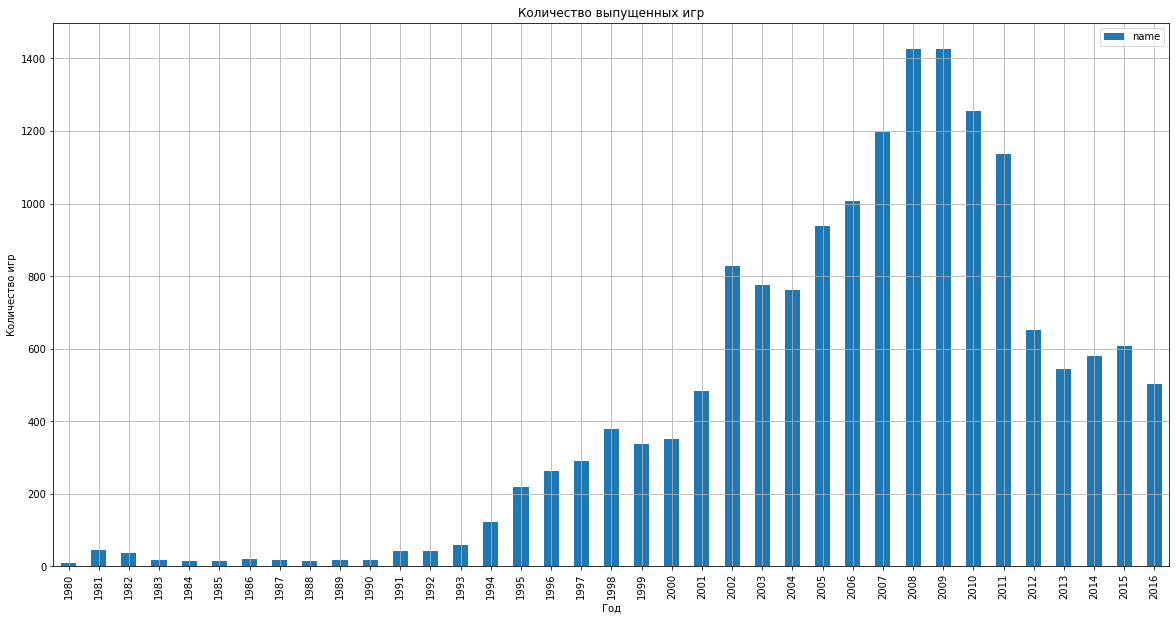

In [ ]:
(
    games.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar' , grid=True, figsize=(20, 10))
)
plt.title('Количество выпущенных игр')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

In [ ]:
games['year_of_release'].describe().astype(int)

count    16443
mean      2006
std          5
min       1980
25%       2003
50%       2007
75%       2010
max       2016
Name: year_of_release, dtype: int64

Видим, что с начала 90-х количество игр, выпускаемых ежегодно, начинает расти и доходит до пика в 2008-2009 годах, затем снижается и с 2012 года устанавливается приблизительно на одном уровне. Но так как игровые тенденции и технические возможности с годами меняются, то для нашей цели исследования, корректнее всего взять временной промежуток последних 10-15 лет.  
Отбросим все данные о играх до 2003 года (первого квартиля) и добавим в новый датафрейм.

In [ ]:
games_new = games.loc[games['year_of_release'] > 2002].reset_index()
games_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12808 entries, 0 to 12807
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            12808 non-null  int64  
 1   name             12808 non-null  object 
 2   platform         12808 non-null  object 
 3   year_of_release  12808 non-null  int64  
 4   genre            12808 non-null  object 
 5   na_sales         12808 non-null  float64
 6   eu_sales         12808 non-null  float64
 7   jp_sales         12808 non-null  float64
 8   other_sales      12808 non-null  float64
 9   critic_score     12808 non-null  int64  
 10  user_score       12808 non-null  float64
 11  rating           12808 non-null  object 
 12  total_sales      12808 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.3+ MB


### Исследуем продажи по платформам

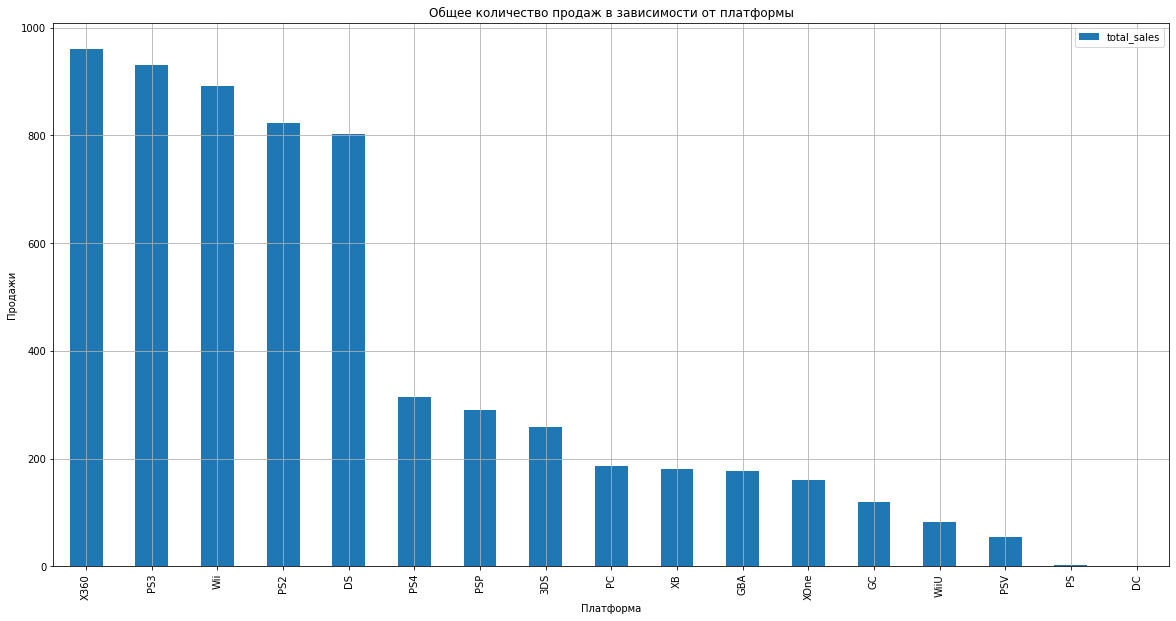

In [ ]:
(
    games_new.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar' , grid=True, figsize=(20, 10))
)
plt.title('Общее количество продаж в зависимости от платформы')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

Больше всего продаж у 5 платформ: X360, PS3, Wii, PS2, DS

In [ ]:
top_platforms = ['X360', 'PS3', 'Wii', 'PS2', 'DS']

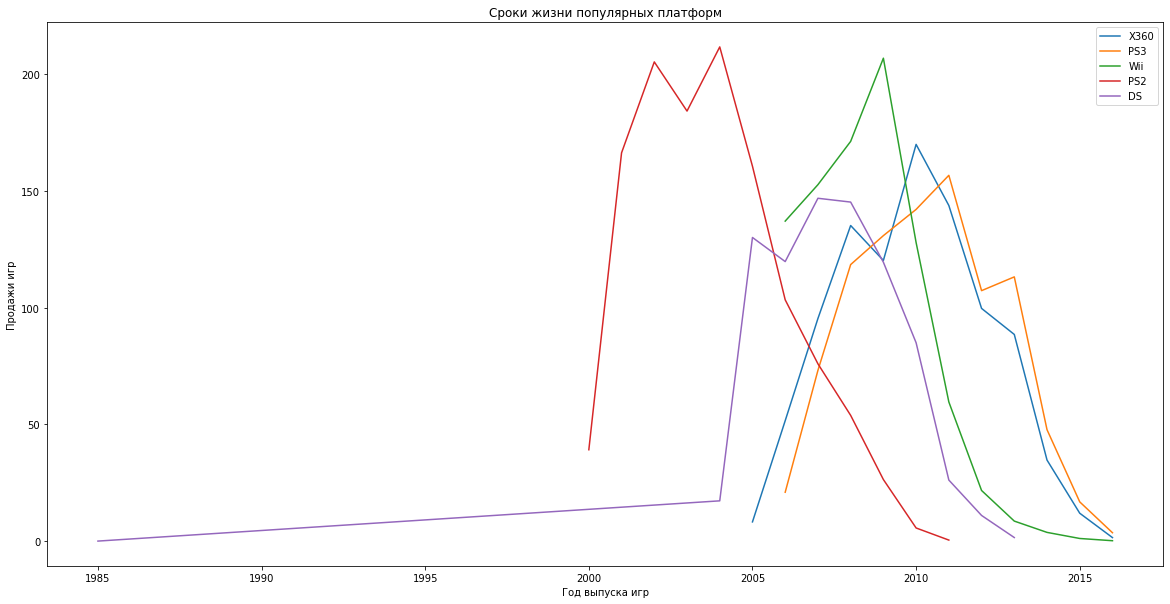

In [ ]:
for name in top_platforms:
    (
    games.query('platform == @name')
        .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
        .sort_values('year_of_release', ascending = False)['total_sales']
        .plot(figsize = (20, 10), label=name)
    )
    plt.title('Сроки жизни популярных платформ')
    plt.xlabel('Год выпуска игр')
    plt.ylabel('Продажи игр')
    plt.legend()

График для DS выглядит неправдоподобно.  
DS вышла 2004 году, значит можно удалить все данные до этого года, так как они внесены с явной ошибкой и их довольно мало, чтобы сильно повлиять на результат.

In [ ]:
games = games.drop(games[(games['year_of_release'] < 2004) & (games['platform'] == 'DS')].index)

Построим графики по обновленным данным

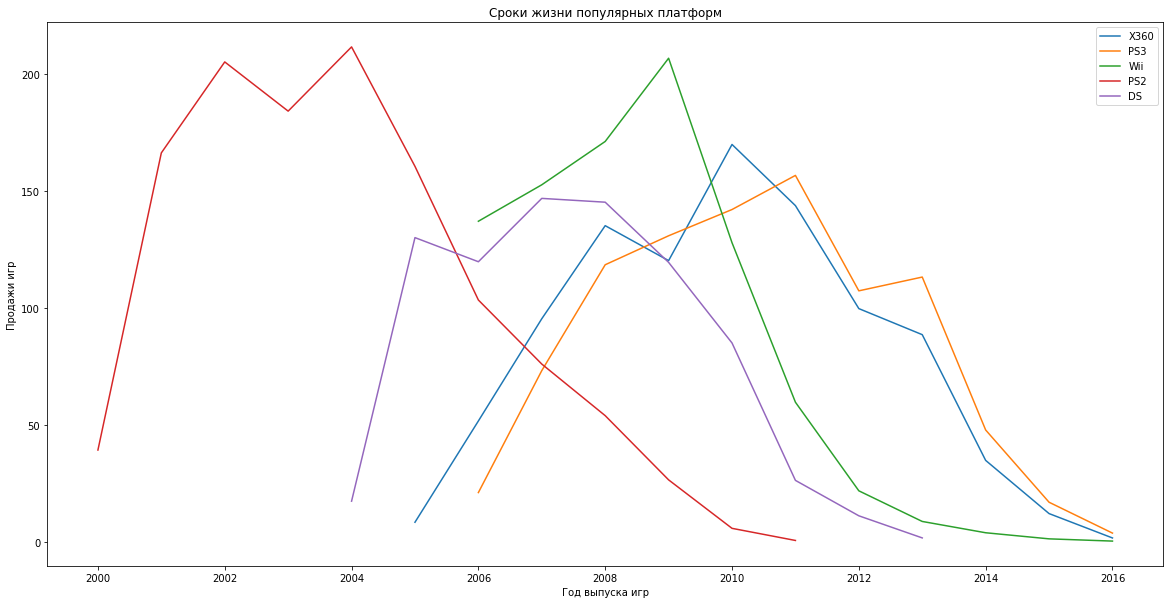

In [ ]:
for name in top_platforms:
    (
    games.query('platform == @name')
        .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
        .sort_values('year_of_release', ascending = False)['total_sales']
        .plot(figsize = (20, 10), label=name)
    )
    plt.title('Сроки жизни популярных платформ')
    plt.xlabel('Год выпуска игр')
    plt.ylabel('Продажи игр')
    plt.legend()

Как видим из графиков, цикл жизни платформы около 10 лет, со смещением пика популярности к первым 3-5 лет.  
Целью нашего исследования является выявить наболее выгодный продукт, по этому за основу стоит взять период, когда продажи растут или близки к пиковым значениям продаж.  
Исходя из этого можно предположить, что наиболее актуальным периодом можно считать последние 4 года.  
Для дальнейшего анализа создадим датафрейм с играми и данными с 2012 года включительно.

In [ ]:
temp = games.copy()
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1
time_life['life'].median()

7.0

In [ ]:
games_for_current_period = games.query('year_of_release >= 2012').copy().reset_index(drop= True)

### Исследуем актуальные и перспективные платформы

Для этого возьмем срез по по всем играм начиная с 2012 года

In [ ]:
promising_platforms = (
    games_for_current_period
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(5)['platform'].tolist()
)
promising_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne']

Теперь построим графики продаж по этим платформам

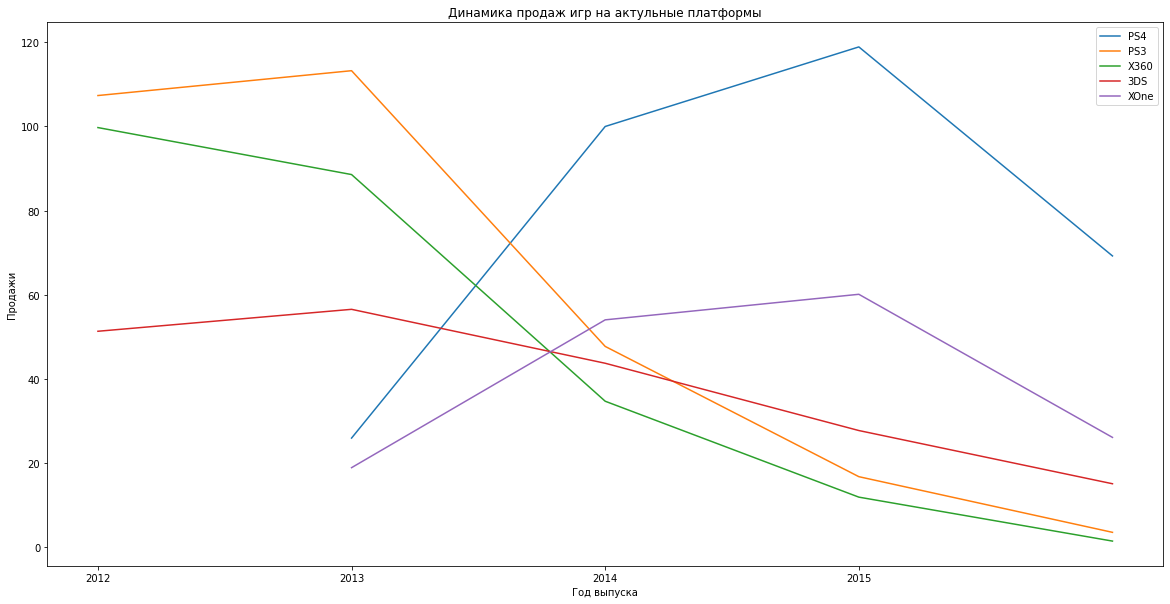

In [ ]:
for name in promising_platforms:
    (
    games_for_current_period.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (20, 10), label=name)
    )
    plt.xticks(np.arange(2012, 2016, step=1))
    plt.title('Динамика продаж игр на актульные платформы')
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи')
    plt.legend()

Из графика видно, что на 2016 год нет явно возрастающих продаж по платформам, продажи падают. Но данные за 2016 год не полные, соответственно логичнее рассматривать, то что было до этого года. При таких условиях явными лидерами будут PS4 и XOne. Так как продажи на эти платформы возрастали в 2015 и эти консоли относительно свежие.

### Построим график «ящик с усами»  по глобальным продажам игр в разбивке по платформам

Text(0, 0.5, 'Платформа')

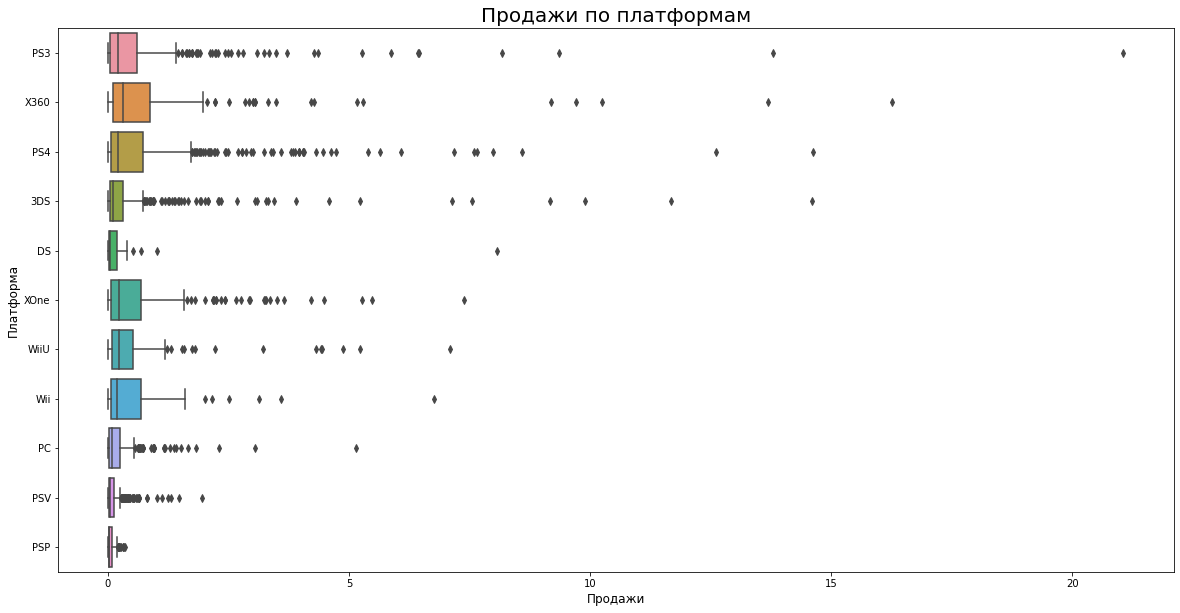

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=games_for_current_period, x='total_sales', y='platform')
plt.title('Продажи по платформам', fontsize=20)
plt.xlabel('Продажи', fontsize=12)
plt.ylabel('Платформа',fontsize=12)

Видим большие выбросы по продажам, отсечем выбросы для более детального рассмотрения

Text(0, 0.5, 'Платформа')

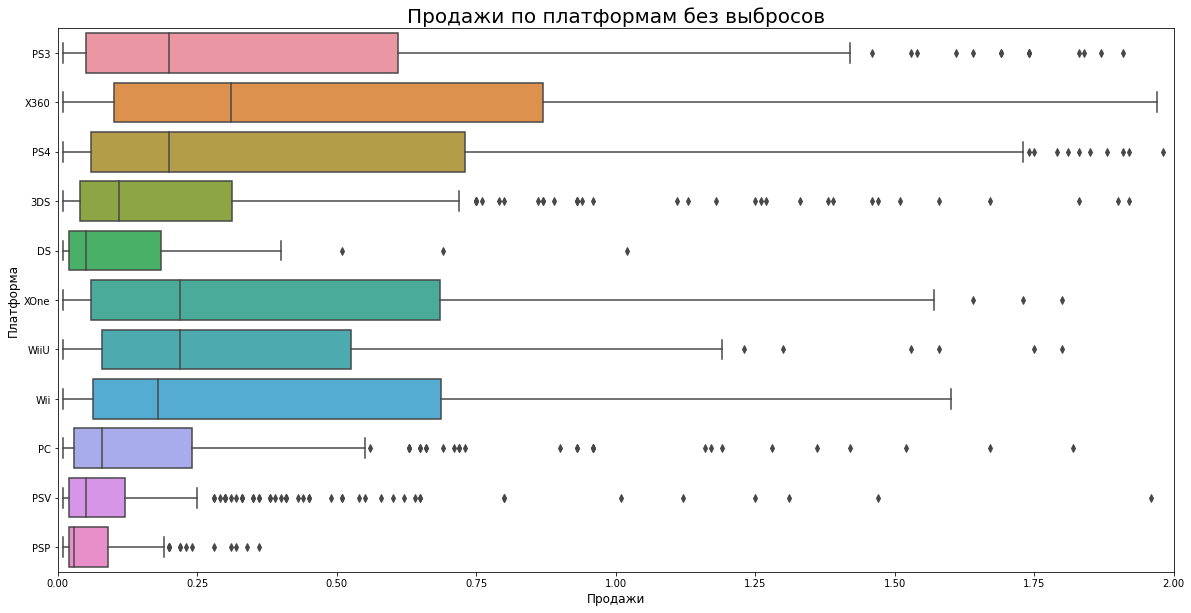

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=games_for_current_period, x='total_sales', y='platform').set(xlim=(0,2))
plt.title('Продажи по платформам без выбросов', fontsize=20)
plt.xlabel('Продажи', fontsize=12)
plt.ylabel('Платформа',fontsize=12)

In [ ]:
games_for_current_period['total_sales'].describe()

count    2885.000000
mean        0.501393
std         1.249340
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

Медианное значение по выборке составляет 0,12 млн., но у большинства платформ этот показатель далек от основного.  
По всем платформам видим выбросы по продажам.  
По другим квартилям так же преобладает большой разброс.

### Влияние отзывов на продажи

#### Отызвы пользователей и продажи для перспективных платформ

Построим диаграммы рассеяния для среза перспективных платформ определенных ранее в пункте 3.3

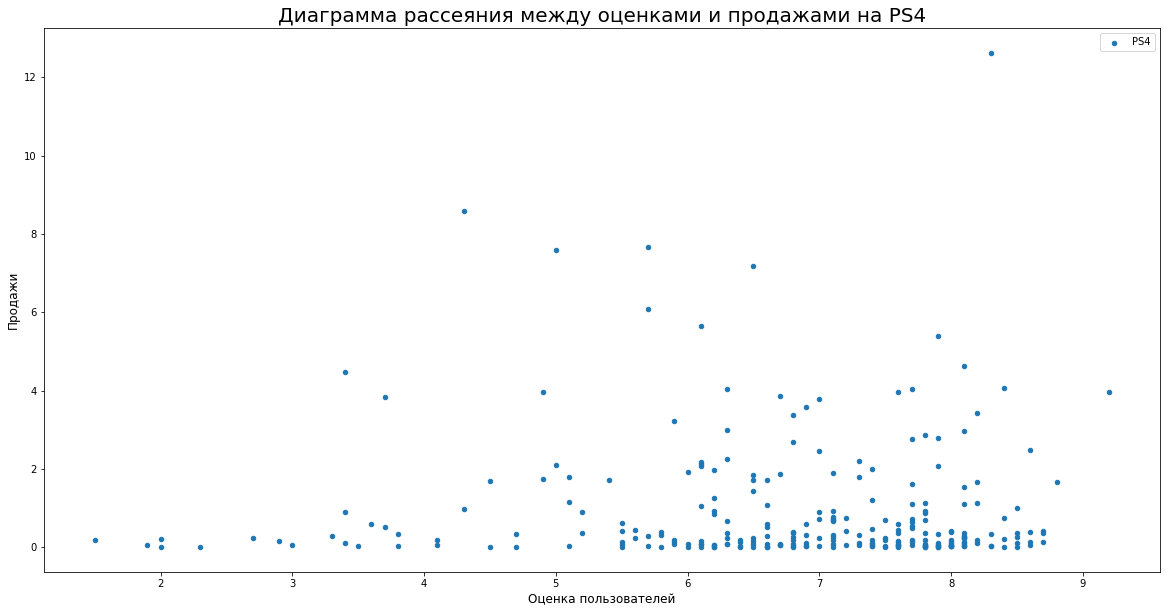

Коэффициент корреляции для PS4  -0.031957110204556376


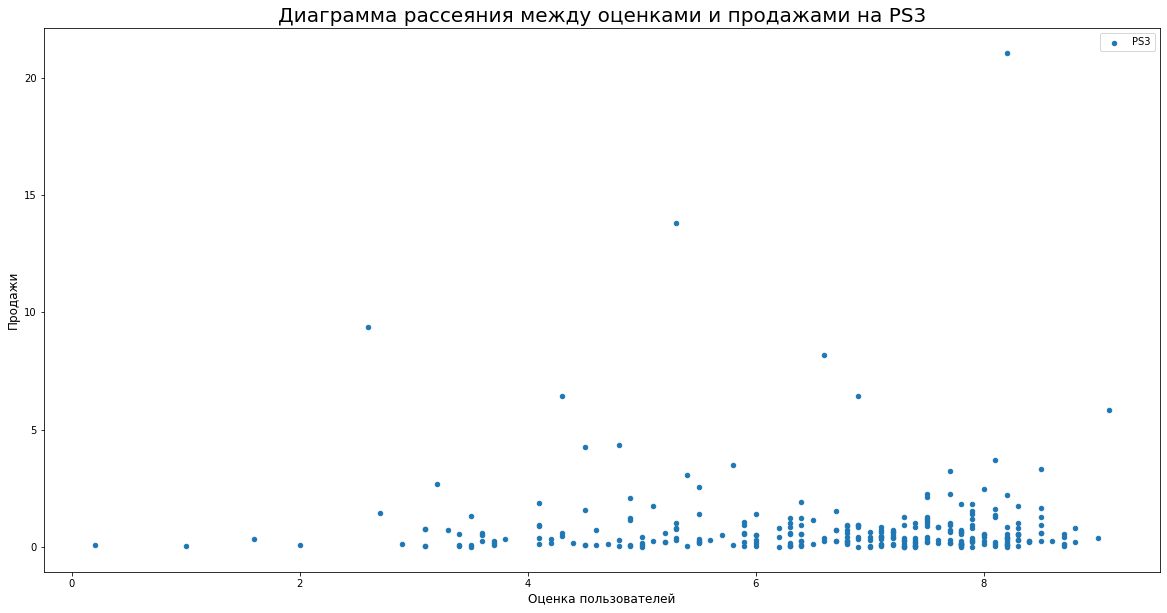

Коэффициент корреляции для PS3  -0.006205767686051523


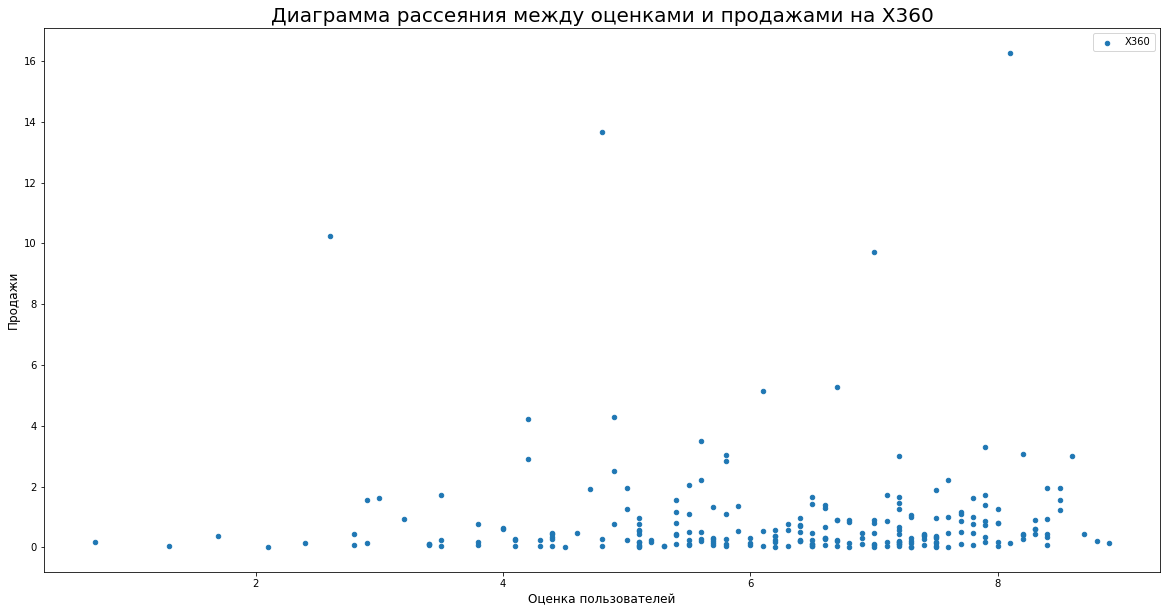

Коэффициент корреляции для X360  0.006163978646213326


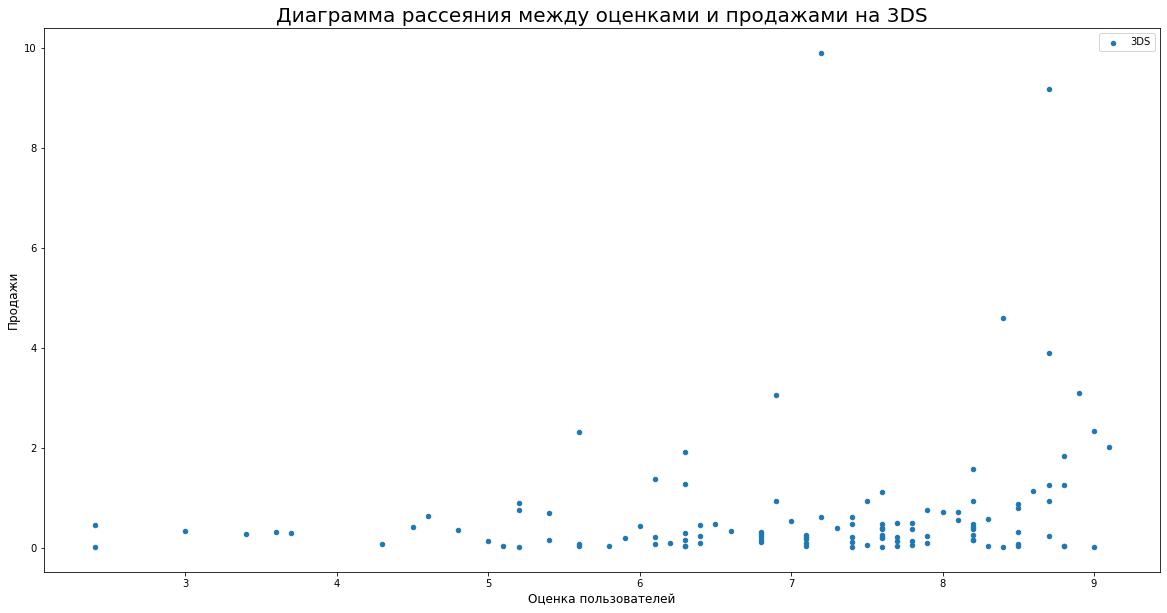

Коэффициент корреляции для 3DS  0.19758263411038599


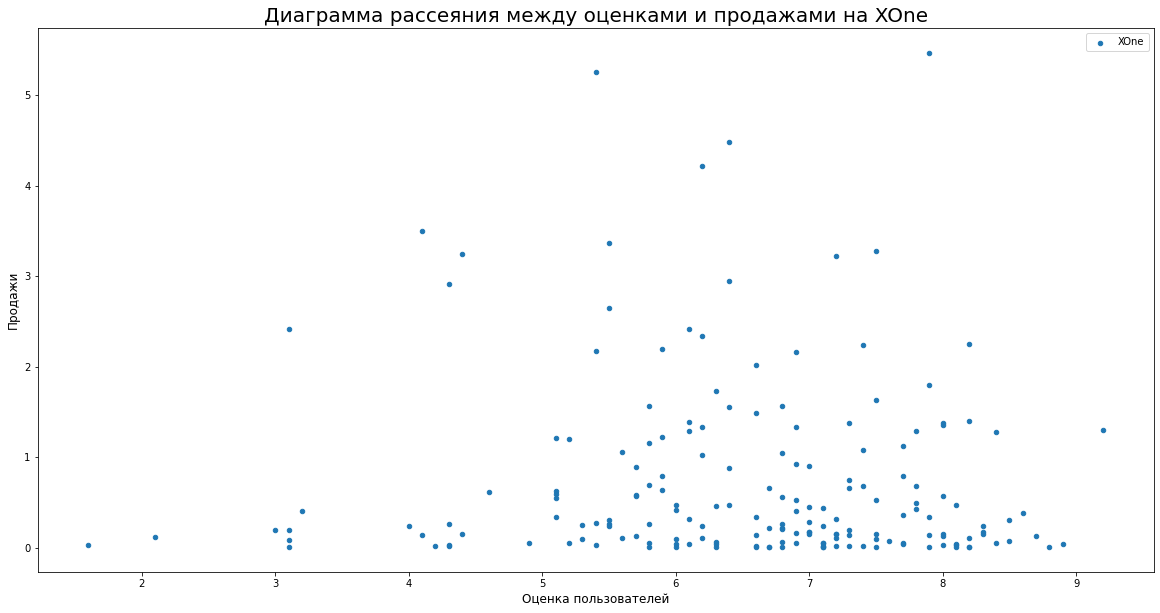

Коэффициент корреляции для XOne  -0.06892505328279414


In [ ]:
for name in ['PS4', 'PS3', 'X360', '3DS', 'XOne']:
    (
    games_for_current_period
        .query('platform == @name and user_score > -1')
        .plot(x='user_score', y='total_sales', kind='scatter', figsize=(20, 10))
    )
    plt.title(f'Диаграмма рассеяния между оценками и продажами на {name}', fontsize=20)
    plt.xlabel('Оценка пользователей', fontsize=12)
    plt.ylabel('Продажи', fontsize=12)
    plt.legend([name])
    plt.show()

    print(f'Коэффициент корреляции для {name} ',
          #пропуски в оценках и ецнки с пометкой "tbd" мы заменяли на -1, по этому добавим это условие к срезу
          games_for_current_period.query('platform == @name and user_score > -1')['user_score']
          .corr(games_for_current_period.query('platform == @name and user_score > -1')['total_sales'])
         )

Диаграммы распределения указывают на слабую связь между отзывами пользователями и продажами, что подтверждают коэффициенты корреляции. Лишь в платформе 3DS мы видим чуть более сильную зависимость, с коэффициентом корреляции близким к 0.2, но все равно низким для того, чтобы утверждать по зависимости продаж от ценок пользователей.

#### Отзывы критиков и продажи для перспективных платформ

Построим аналогичные диаграммы рассеяния только теперь для отзывов критиков

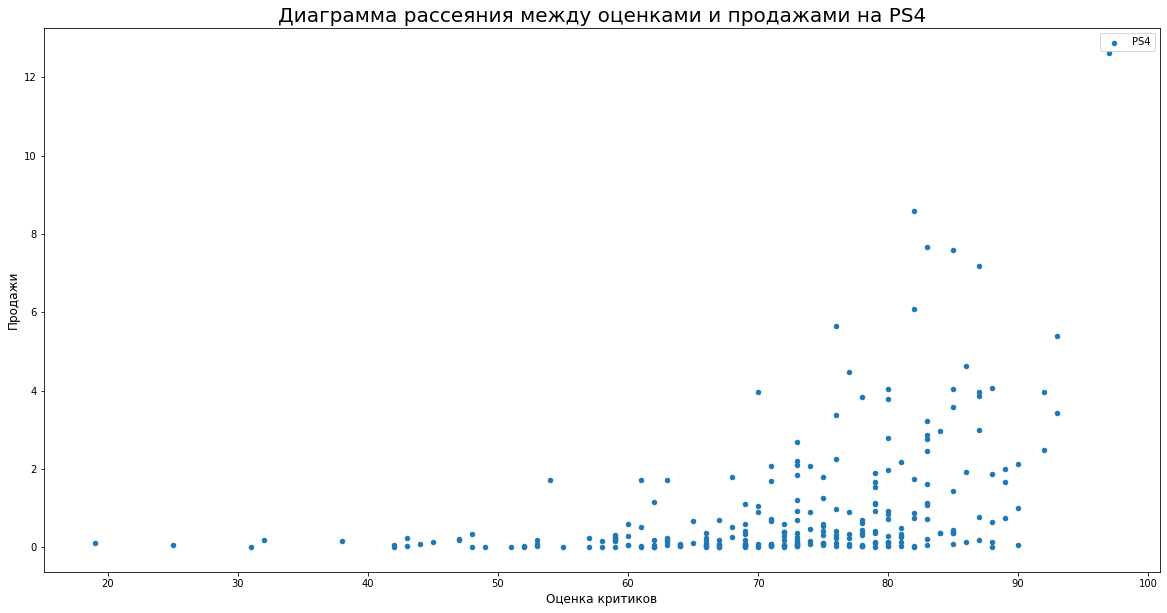

Коэффициент корреляции для PS4  0.40656790206178095


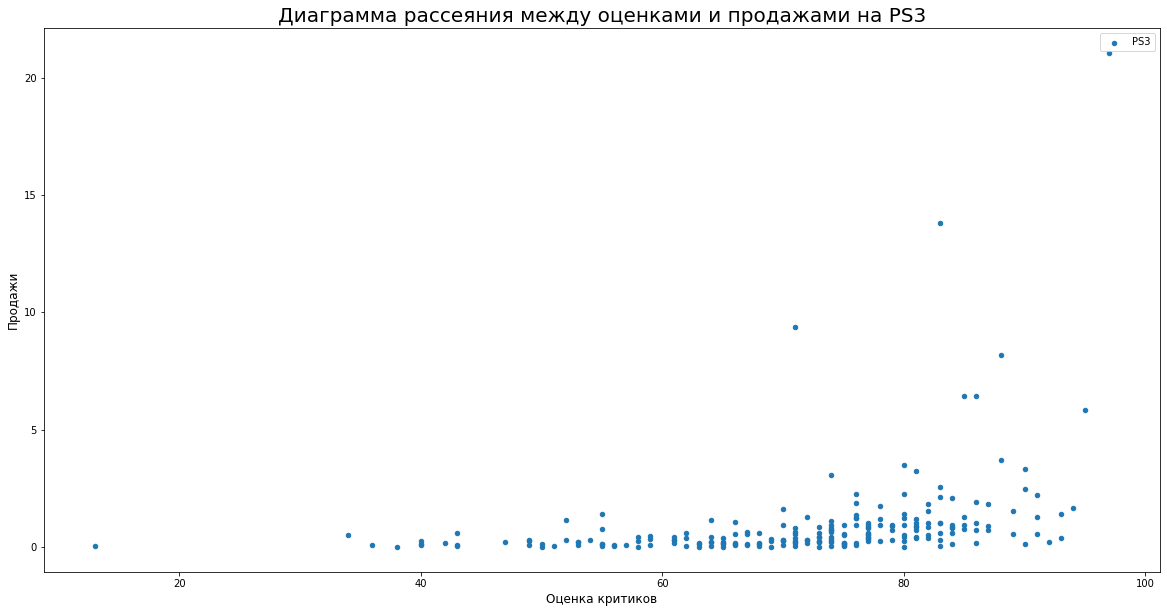

Коэффициент корреляции для PS3  0.3341517575509856


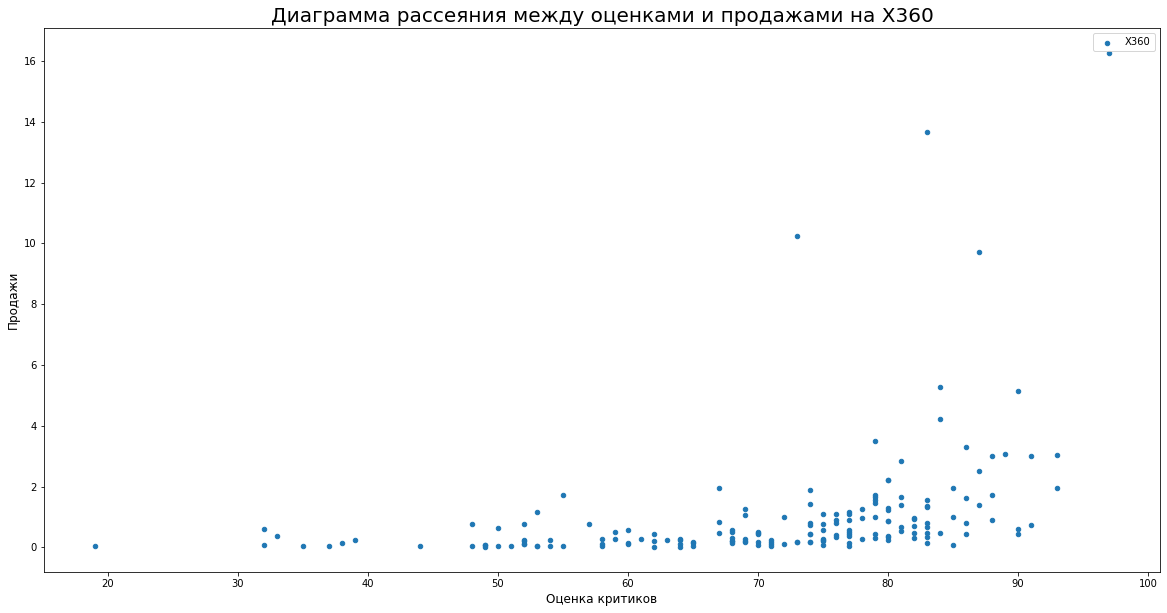

Коэффициент корреляции для X360  0.3605734888507336


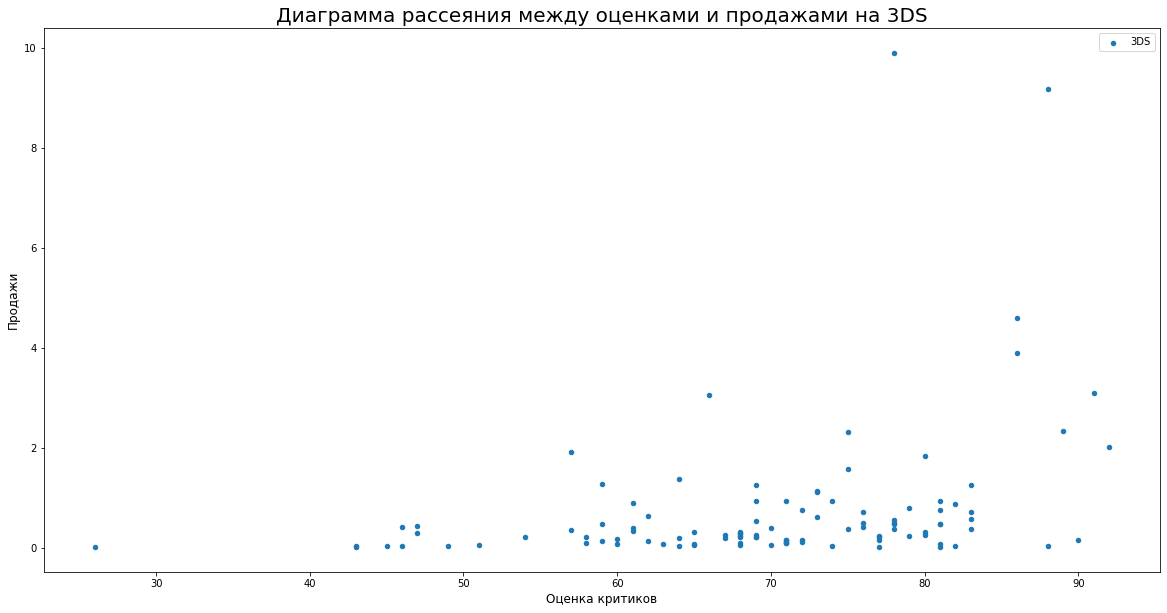

Коэффициент корреляции для 3DS  0.3208028695360785


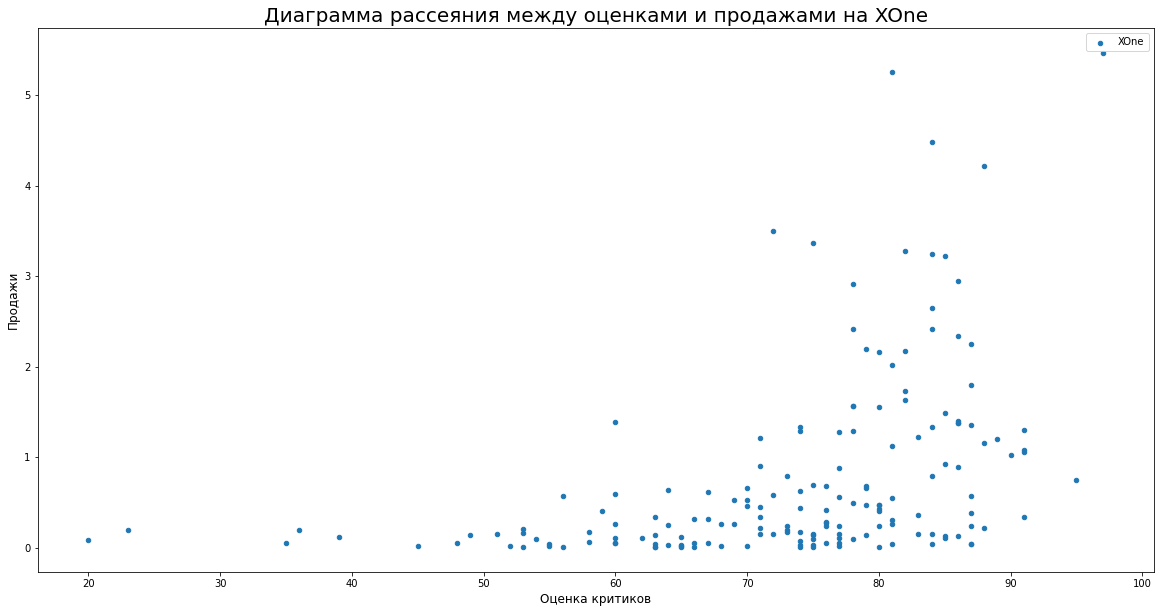

Коэффициент корреляции для XOne  0.4169983280084017


In [ ]:
for name in ['PS4', 'PS3', 'X360', '3DS', 'XOne']:
    (
    games_for_current_period
        .query('platform == @name and critic_score > -1')
        .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(20, 10))
    )
    plt.title(f'Диаграмма рассеяния между оценками и продажами на {name}', fontsize=20)
    plt.xlabel('Оценка критиков', fontsize=12)
    plt.ylabel('Продажи', fontsize=12)
    plt.legend([name])
    plt.show()

    print(f'Коэффициент корреляции для {name} ',
          #пропуски в оценках мы заменяли на 0, по этому добавим это условие к срезу
          games_for_current_period.query('platform == @name and critic_score > -1')['critic_score']
          .corr(games_for_current_period.query('platform == @name and critic_score > -1')['total_sales'])
         )

Диаграммы распределения указывают на умеренную связь между отзывами критиков и продажами, что подтверждают и коэффициенты корреляции.

#### Влияние отзывов на продажи в целом

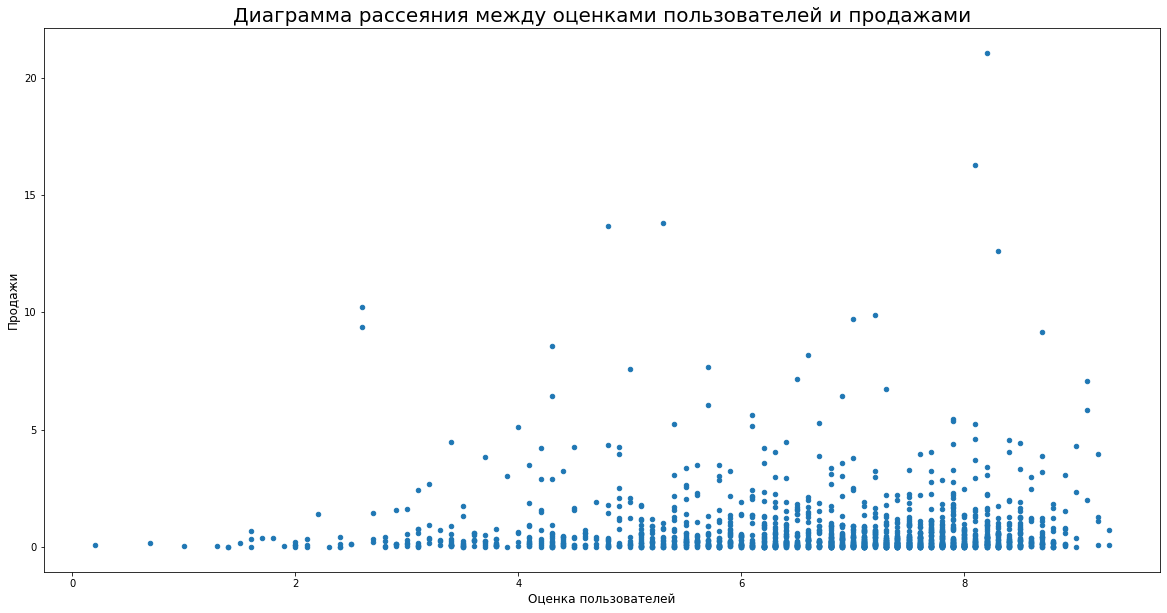

Коффициент корреляции между оценками пользователей и продажами: 0.0041944811069172284


In [ ]:
(
games_for_current_period
    .query('user_score > -1')
    .plot(x='user_score', y='total_sales', kind='scatter', figsize=(20, 10))
)
plt.title(f'Диаграмма рассеяния между оценками пользователей и продажами', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Продажи', fontsize=12)
plt.show()
print('Коффициент корреляции между оценками пользователей и продажами:',
          games_for_current_period.query('user_score > -1')['user_score']
          .corr(games_for_current_period.query('user_score > -1')['total_sales'])
         )

Диаграмма рассеяния по оценкам пользователей говорит о том, что отзывы для совокупности всех платформ оказывают очень слабое влияние на продажи, что подтверждает низкий коэффициент корреляции - 0.0044

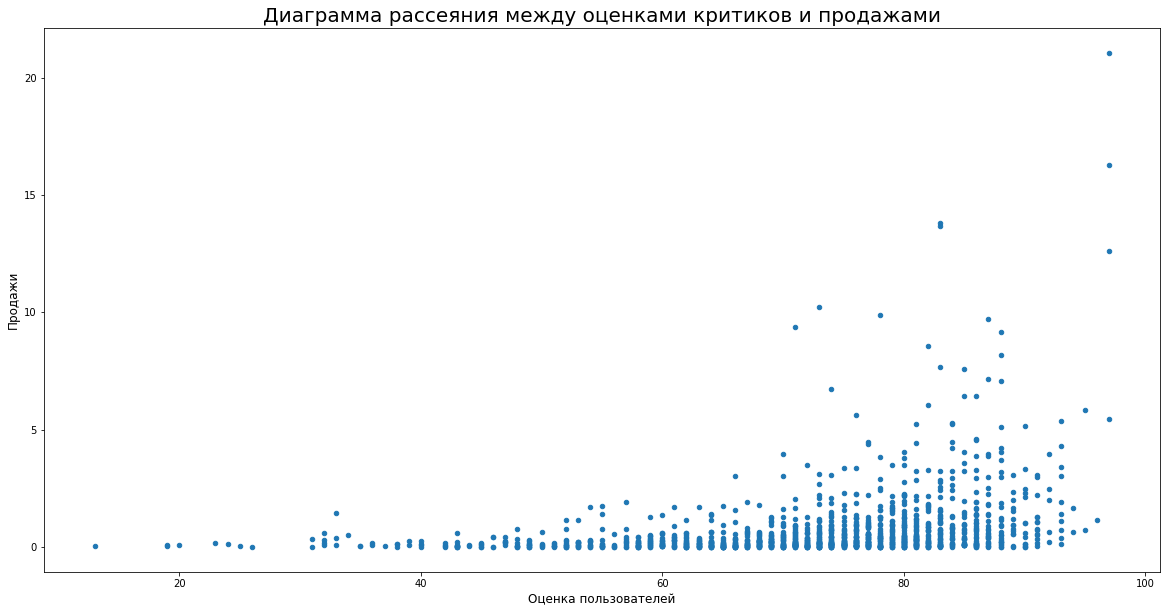

Коффициент корреляции между оценками критиков и продажами: 0.30863336128976016


In [ ]:
(
games_for_current_period
    .query('critic_score > 0')
    .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(20, 10))
)
plt.title(f'Диаграмма рассеяния между оценками критиков и продажами', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Продажи', fontsize=12)
plt.show()
print('Коффициент корреляции между оценками критиков и продажами:',
          games_for_current_period.query('critic_score > -1')['critic_score']
          .corr(games_for_current_period.query('critic_score > -1')['total_sales'])
         )

Диаграмма рассеяния по оценкам критиков говорит о том, что отзывы для совокупности всех платформ оказывают умеренное влияние на продажи, что подтверждает коэффициент корреляции - 0.3

**Вывод:**  
Диаграммы рассеяния, как и коэффициент корреляции для случаев с конкретными платформами, так и для общей совокупности платформ показывают следующее:
* Оценки пользователей практически не влияют на продажи
* Оценки критиков имеют умеренное влияние на продажи

### Исследуем общее распределение игр по жанрам

Определим самую высокую сумму продаж за актуальный период

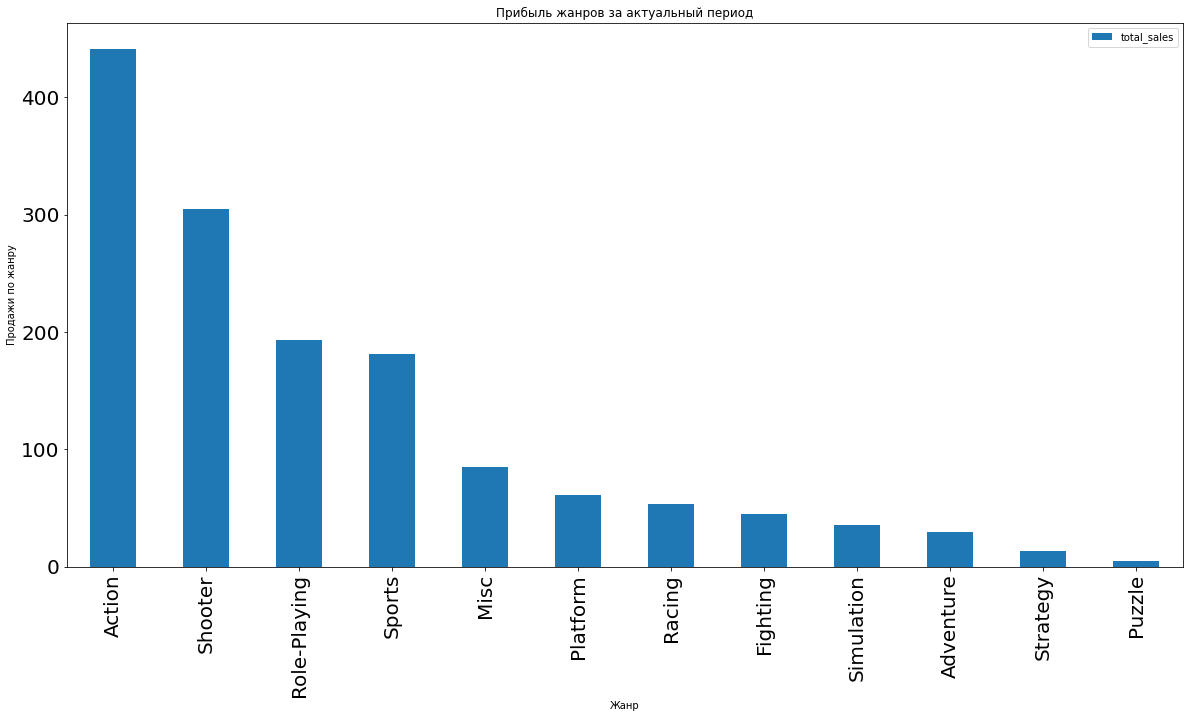

In [ ]:
(
    games_for_current_period
     .pivot_table(index='genre', values='total_sales', aggfunc='sum')
     .sort_values('total_sales', ascending=False)
     .plot(kind='bar', y='total_sales', figsize=(20, 10), title = 'Прибыль жанров за актуальный период', fontsize=20)
     .set(xlabel='Жанр', ylabel='Продажи по жанру')
)

plt.show()

Здесь мы видим явных лидеров: 'Action', 'Shooter'

Построим графики ежегодных продаж по жанрам

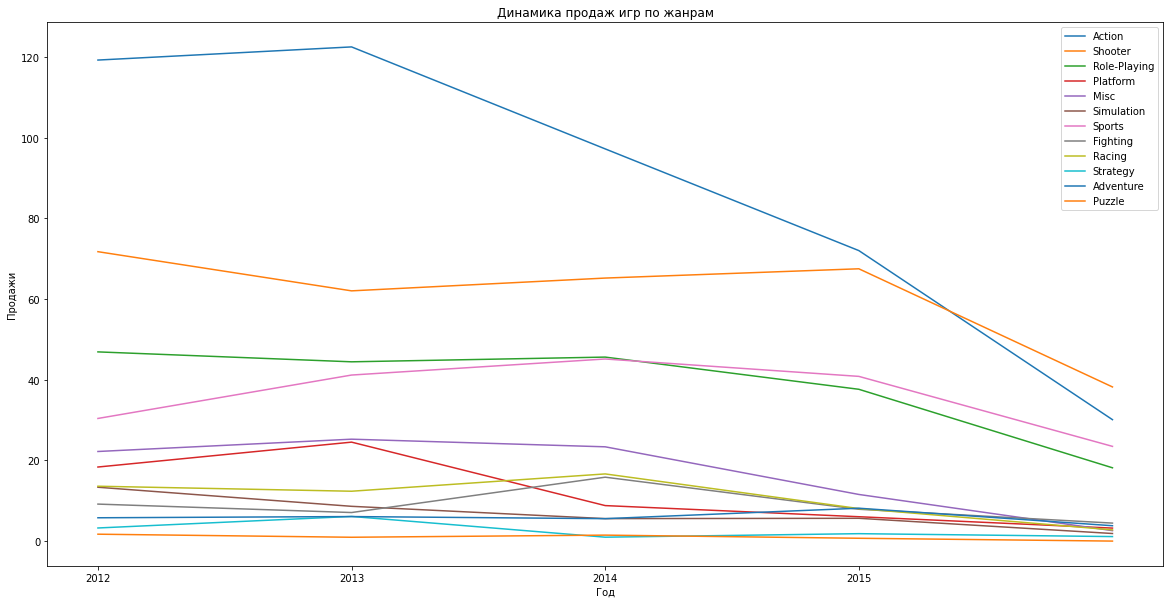

In [ ]:
for name in games_for_current_period['genre'].unique():
    (
    games_for_current_period.query('genre == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (20, 10), label=name)
    )
    plt.xticks(np.arange(2012, 2016, step=1))
    plt.title('Динамика продаж игр по жанрам')
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    plt.legend()

Так как данные за 2016 год могут быть не полными, возьмем за основу показатели 2015 года, там мы видим довольно резкое снижение продаж в жанре "Action" относительно предыдущего года, а в жанре "Shooter" наоборот наблюдается хоть и незначительный, но рост. Жанры "Role-Playing" и "Spotrs" выглядят близко постоянным величинам с небольшими колебаниями и ничем не выделяются, хотя у последнего просматривается небольшая тенденция к росту. Продажи остальных жанров довольно низкие и бесперспективные на данный момент.

Для большей наглядности проанализируем медианные значения по продажам.

In [ ]:
(
  games_for_current_period
 .pivot_table(index='genre', values='total_sales', aggfunc='median')
 .sort_values('total_sales', ascending=False)
)

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


**Вывод:**  
За актуальный период наиболее востребованым стал жанр 'Shooter', единственый имеющий значительный рост за последние годы к тому же обладающий весьма высоким медианным показателем выручки 0.44 млн. копий, в сравнении с остальными.  
  
  На вопрос о прибыльности того или иного жанра найти ответ не вижу возможным, т. к. мы имеем в данных число проданных копий, но не их стоимость, которая может разнится как от жанра к жанру, так и от игры к игре, что может коренным образом изменить прибыльность даже не самых востребованых жанров.

### Вывод по исследовательскому анализу

* Мы убрали все игры старше 2003 года, т. к. рассматривать старые зачастую забытые игры не имеет смысла, к тому же сменились и поколения геймеров.  
* На основе имеющихся данных, провели исследование продаж по платформам и выявили наиболее актуальный период - с 2012 года включительно.  
* Исследовав актуальные и перспективные платформы, определили 2 наиболее подходящие платформы: XOne и PS4.  
* С помощью диаграмм рассеяния и коэффициента корреляции выяснили, что зависимости между отзывами пользователей и продажами практически отсутствует, а у оценок критиков и продаж прослеживается довольно умеренная зависимость.  
* Выяснили, что за актуальный период наиболее востребованым стал жанр 'Shooter' с наивысшим среди всех медианным значением продаж.

## 4 шаг. Составим портрет пользователя каждого региона

Напишем функцию для подсчета суммы продаж по тому или иному показателю относительно региона. Так же добавим в функцию добавление столбца с долей продаж.

In [ ]:
def top_five(column, region):
    df = (games_for_current_period
          .pivot_table(index=[column], values=[region], aggfunc='sum')
          .sort_values(region, ascending=False).reset_index()
    )
    df = df.head(5).append({column : 'Other',
                            region :  df.loc[5 : , region].sum(axis = 0)},
                           ignore_index=True)

    result = df.assign(percent = round((df[region] / df[region].sum())*100,2))

    return result

Напишем функцию для построения круговых диаграмм

In [ ]:
def pie_chart(df, column, i):
    (df
     .pivot_table(index=i, values=column, aggfunc='sum')
     .plot(kind='pie', y=column, autopct='%1.0f%%', figsize=(5, 5), legend=False)
    )

    plt.title(f'Доли исcледуемых данных для столбца {column}', fontsize = 10)

    return plt.show()

### Топ 5  платформ по продажам в каждом регионе

Топ 5 платформ по региону: Америка 

  platform  na_sales  percent
0     X360    140.05    23.70
1      PS4    108.74    18.40
2      PS3    103.38    17.49
3     XOne     93.12    15.76
4      3DS     55.31     9.36
5    Other     90.37    15.29 



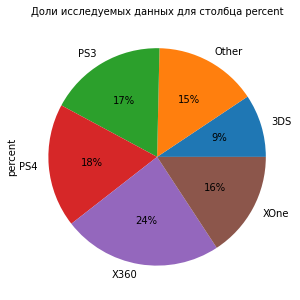

Топ 5 платформ по региону: Европа 

  platform  eu_sales  percent
0      PS4    141.09    27.84
1      PS3    106.85    21.08
2     X360     74.52    14.70
3     XOne     51.59    10.18
4      3DS     42.64     8.41
5    Other     90.12    17.78 



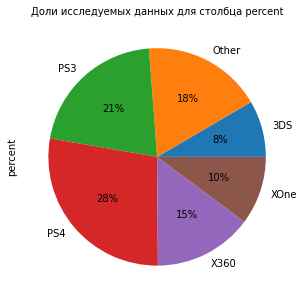

Топ 5 платформ по региону: Япония 

  platform  jp_sales  percent
0      3DS     87.79    45.59
1      PS3     35.29    18.32
2      PSV     21.04    10.93
3      PS4     15.96     8.29
4     WiiU     13.01     6.76
5    Other     19.49    10.12 



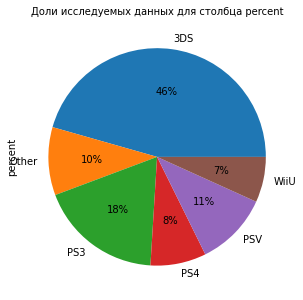

Топ 5 платформ по региону: прочие 

  platform  other_sales  percent
0      PS4        48.35    30.96
1      PS3        43.26    27.70
2     X360        20.40    13.06
3     XOne        14.27     9.14
4      3DS         8.87     5.68
5    Other        21.01    13.45 



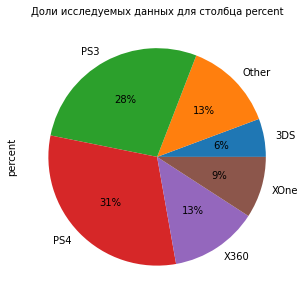

In [ ]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for region in regions:

    if region == 'na_sales':
        name = 'Америка'
    elif region == 'eu_sales':
        name = 'Европа'
    elif region == 'jp_sales':
        name = 'Япония'
    else:
        name = 'прочие'

    print(f'Топ 5 платформ по региону: {name} \n')
    df = top_five('platform', region)
    print(df, '\n')
    pie_chart(df, 'percent', 'platform')

Выделив топ 5 платформ по каждому региону видим, что Северная Америка, Европа и остальные страны имеют одинаковый набор платформ в топе, отличающийся лишь распределением популярности, так доля консолей от Sony выше 20% по европе и остальному миру, тогда как в Северной Америке доли в топе не сильно разнятся, хоть и преобладает Xbox выпущенная американской компанией, США же явно обладает львиной долей рынка на континенте, осюда и преимующество.  
Приверженность к локальному производству платформ четче всего демострируется в Японии, где весь топ занимают платформы местного производства, а так же прослеживается преобладание портативных консолей. О чем дополнительно свидетельствует, занятые 45,5% локального рынка платформой Nintendo 3DS

### Топ 5 жанров по продажам в каждом регионе

Топ 5 жанров по региону: Америка 

          genre  na_sales  percent
0        Action    177.84    30.09
1       Shooter    144.77    24.50
2        Sports     81.53    13.80
3  Role-Playing     64.00    10.83
4          Misc     38.19     6.46
5         Other     84.64    14.32 



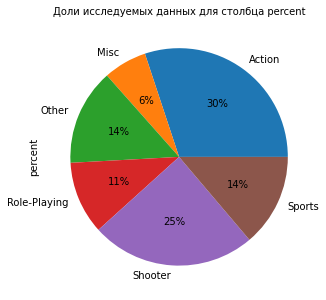

Топ 5 жанров по региону: Европа 

          genre  eu_sales  percent
0        Action    159.34    31.44
1       Shooter    113.47    22.39
2        Sports     69.08    13.63
3  Role-Playing     48.53     9.58
4        Racing     27.29     5.38
5         Other     89.10    17.58 



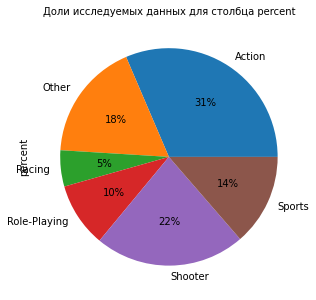

Топ 5 жанров по региону: Япония 

          genre  jp_sales  percent
0  Role-Playing     65.44    33.98
1        Action     52.80    27.42
2          Misc     12.86     6.68
3    Simulation     10.41     5.41
4      Fighting      9.44     4.90
5         Other     41.63    21.62 



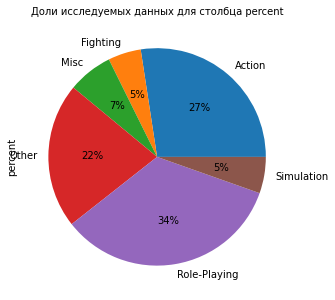

Топ 5 жанров по региону: прочие 

          genre  other_sales  percent
0        Action        51.14    32.75
1       Shooter        37.26    23.86
2        Sports        22.44    14.37
3  Role-Playing        14.83     9.50
4          Misc         7.67     4.91
5         Other        22.82    14.61 



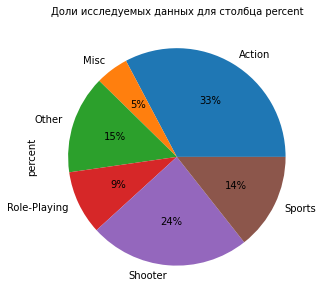

In [ ]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for region in regions:

    if region == 'na_sales':
        name = 'Америка'
    elif region == 'eu_sales':
        name = 'Европа'
    elif region == 'jp_sales':
        name = 'Япония'
    else:
        name = 'прочие'

    print(f'Топ 5 жанров по региону: {name} \n')
    df = top_five('genre', region)
    print(df, '\n')
    pie_chart(df, 'percent', 'genre')

Выделив топ 5 жанров по каждому региону видим, что Северная Америка, Европа и остальные страны имеют одинаковый набор жанров как по распределению позиций в топе, так и по доле рынка (имеющие незначительные отклонения относительно разных регионов). В Японии же мы видим резкое отличие в предпочитаемых жанрах здесь основную долю занимают Role-Playing и Action, чья совокупная доля 61%. Скорее всего это объясняется довольно отличным локальным выбором платформ.

### Влияние рейтинга ESRB на продажи в регионах

EC («Early childhood») — «Для детей младшего возраста».  
E («Everyone») — «Для всех».   
E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше».  
T («Teen») — «Подросткам».   
M («Mature 17+») — «Для взрослых».   
AO («Adults Only 18+») —  «Только для взрослых».  
RP («Rating Pending») — «Рейтинг ожидается».

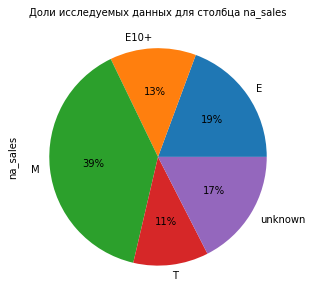

In [ ]:
pie_chart(games_for_current_period, 'na_sales', 'rating')

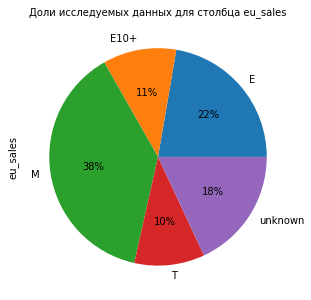

In [ ]:
pie_chart(games_for_current_period, 'eu_sales', 'rating')

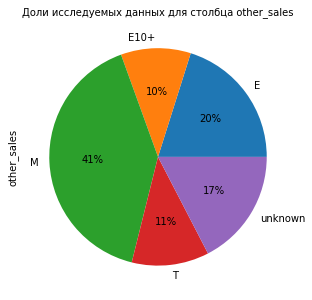

In [ ]:
pie_chart(games_for_current_period, 'other_sales', 'rating')

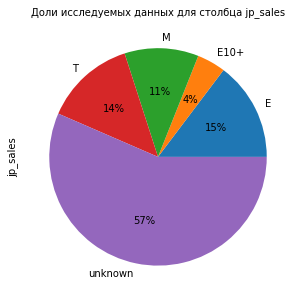

In [ ]:
pie_chart(games_for_current_period, 'jp_sales', 'rating')

Как видим в Японии первое место занимают игры с неуказанным рейтингом "unknown" - 57%, затем игры для всех "Е" - 15% и игры для подростков "T" - 14%. В остальных же регионах ситуация близка к идентичной, мы видим преобладание рейтинга для взрослых "M" - везде около 40%, остальные рейтинги так же распределены и представлены в схожих долях.

### Вывод по портрету пользователя

Иходя из нашего исследвания можно выделить 3 основных портрета пользователей:  
  
  * Пользователь из Америки чаще предпочитающий Xbox, жанры: Action и Shooter с рейтингом "M" - для взрослых
  * Европа и другие страны схожи с Америкой есдинственное отличие в том, что европейцы предпочтительнее выбирают платформы: PS4 и PS3
  * Совершенно отличный портрет демонстрирует Япония: в подавляющем большинстве случаев преобладает местная платформа Nintendo 3DS, предпочтительными жанрами становятся Role-Playing и Action

## 5 шаг. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Изначально нас спрашивают: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?", что полностью совпадает с фольмулировкой нулевой гипотезы Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны. Альтернативную гипотезу монжно проверить в трёх направлениях: "<", ">" или "!=" нас же интересует вопрос того одинаковы ли рейтинги платформ, значит сформулируем альтернативную гипотезу H1: Средние пользовательские рейтинги платформ Xbox One и PC неравны.

In [ ]:
xbox_one = games_for_current_period.query('platform == "XOne" and user_score != -1')
pc = games_for_current_period.query('platform == "PC" and user_score != -1')

Выдвинем гипотезы:  
      
* Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны
* Н1: Средние пользовательские рейтинги платформ Xbox One и PC неравны

In [ ]:
alpha = 0.05
#т. к. вопрос стоит про равенство произведем двусторонюю проверку
results = st.ttest_ind(xbox_one['user_score'], pc['user_score'], equal_var=False, alternative='two-sided')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print('\nСреднеий рейтинг по платформе Xbox One:', round(xbox_one['user_score'].mean(), 2))
print('Среднеий рейтинг по платформе PC:', round(pc['user_score'].mean(), 2))

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу

Среднеий рейтинг по платформе Xbox One: 6.52
Среднеий рейтинг по платформе PC: 6.43


**Вывод:**  
    Нулевая гипотеза не отвергнута, следовательно можем полагать, что рейтинги платформ Xbox One и PC одинаковые, при установленном уровне значимости в 5 %.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Изначально нас спрашивают: "Средние пользовательские рейтинги жанров Action и Sports разные?", проверить это напрямую не получится, нулевая гипотеза должна отражать равенство, но мы можем действовать от противного Н0: Средние пользовательские рейтинги жанров Action и Sports равны. А альтернативную гипотезу принять Н1: Средние пользовательские рейтинги жанров Action и Sports неравны.

In [ ]:
action = games_for_current_period.query('genre == "Action" and user_score != -1')
sports = games_for_current_period.query('genre == "Sports" and user_score != -1')

Выдвинем гипотезы:

* Н0: Средние пользовательские рейтинги жанров Action и Sports равны  
* Н1: Средние пользовательские рейтинги жанров Action и Sports неравны

In [ ]:
alpha = 0.05
#т. к. вопрос стоит про равенство произведем двусторонюю проверку
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False, alternative='two-sided')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print('\nСреднеий рейтинг по жанру Action:', round(action['user_score'].mean(), 2))
print('Среднеий рейтинг по жанру Sports:', round(sports['user_score'].mean(), 2))

5.989458066467418e-20
Отвергаем нулевую гипотезу

Среднеий рейтинг по жанру Action: 6.83
Среднеий рейтинг по жанру Sports: 5.46


**Вывод:**  
Нулевая гипотеза отвергнута, следовательно можем полагать, что рейтинги жанров Action и Sports разные, при установленном уровне значимости в 5 %.

## 6 шаг. Общий вывод

В ходе проведения анализа были выполнены следующие шаги и сделаны следующие выводы.  
  
**1. Изучили общую информацию о данных**
      
Определили, что шести столбцах присутствуют пропуски в данных, названия колонок нарушают стиль, явные дубликаты отсутсувуют. Некоторые колонки имеют неверный тип данных.  
    
**2. Выполнили предобработку данных**  
      
 * Привели все названия столбцов к нужному виду.  
 * Выявили пару неявных дубликатов и удалили их.
 * Обработали пропуски:  
     Удалили строки с пропусками в столбцах **name** и **years_of_release**. Возможной причиной пропусков в этих столбцах может быть человеческий или технический фактор (данные могли криво подтянуться)  
     Ввели отметки в столбцы **criric_score** и **user_score**. Причинами пропусков могли послужить человеческий фактор, отсутстивие данных по рейтингам из общепринятых источников (допустим это справедливым для наиболее старых игр на заре развития интернета), либо же игра вовсе не оценивалась (к примеру, по свежей игре ещё может быть не собрано достаточно данных).  
     Заменили пропуски в **rating** на "unknown". Причины могут быть схожи с причинами пропусков по оценкам критиков, но в данном столбце основную роль играет то, что это локальный рейтинг для США и Канады.
 * Преобразовали типы столбцов: **year_of_release**, **criric_score**, **user_score**
 * Создали столбец с суммой всех продаж
  
**3. Выполнили исследовательский анализ данных**  
  
* Мы убрали все игры старше 2003 года, т. к. рассматривать старые зачастую забытые игры не имеет смысла, к тому же сменились и поколения геймеров.  
* На основе имеющихся данных, провели исследование продаж по платформам и выявили наиболее актуальный период - с 2012 года включительно.  
* Исследовав актуальные и перспективные платформы, определили 2 наиболее подходящие платформы: XOne и PS4.  
* С помощью диаграмм рассеяния и коэффициента корреляции выяснили, что зависимости между отзывами пользователей и продажами практически отсутствует, за исключением платформы 3DS укоторой прослежтвается хоть и низкое, но влияние отзывов пользователей. У оценок критиков и продаж прослеживается довольно умеренная зависимость.  
* Выяснили, что за актуальный период наиболее востребованым стал жанр 'Shooter' с наивысшим среди всех медианным значением продаж.

**4. Составили портреты пользователей каждого региона из топ 5**  
  
Получили 3 основных портрета пользователей:  
  
  * Пользователь из Америки чаще предпочитающий Xbox, жанры: Action и Shooter с рейтингом "M" - для взрослых
  * Европа и другие страны схожи с Америкой есдинственное отличие в том, что европейцы предпочтительнее выбирают платформы: PS4 и PS3
  * Совершенно отличный портрет демонстрирует Япония: в подавляющем большинстве случаев преобладает местная платформа Nintendo 3DS, предпочтительными жанрами становятся Role-Playing и Action  
    
**5. Проверили гипотезы**
  
  Оба утверждения:  
  * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
  * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
  оказались подтвеждены, , при установленном уровне значимости в 5 %.

**Рекомендация бизнесу.**  
Исходя из данных и выводов по исследованию, можно порекомендовать магазину игр "Стримчик" сконцентрировать внимание на шутерах с рейтингом "М" - для взрослых, на платформы PS4 и Xbox one. Таким образом можно получить наибольший охват аудитории.   
Так же не следует отставлять без внимания, жанры Role-Playing и Action на портативные консоли от Nintendo, но только для Японии.  
  
  Исходя из полученных данных в ходе исследования можем рекомендовать сделать основной упор бюджета на регионы Северная Америка и Европа, т. к. их рынки обладают наивысшими показателями продаж.